In [1]:
import numpy as np
import pandas as pd
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import Lasso, Ridge, ElasticNet
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from statsmodels.stats.outliers_influence import variance_inflation_factor
import matplotlib.pyplot as plt
import scipy as sp
import IPython
import sys
import sklearn
%matplotlib inline
import seaborn as sns
plt.rcParams['figure.figsize'] = (15,13)

In [2]:
train = pd.read_csv("train_BM.csv")
test = pd.read_csv("test_BM.csv")
sample = pd.read_csv("sample_BM.csv")

In [3]:
train

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In [4]:
train.shape

(8523, 12)

In [5]:
test

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3
...,...,...,...,...,...,...,...,...,...,...,...
5676,FDB58,10.500,Regular,0.013496,Snack Foods,141.3154,OUT046,1997,Small,Tier 1,Supermarket Type1
5677,FDD47,7.600,Regular,0.142991,Starchy Foods,169.1448,OUT018,2009,Medium,Tier 3,Supermarket Type2
5678,NCO17,10.000,Low Fat,0.073529,Health and Hygiene,118.7440,OUT045,2002,NaN,Tier 2,Supermarket Type1
5679,FDJ26,15.300,Regular,0.000000,Canned,214.6218,OUT017,2007,NaN,Tier 2,Supermarket Type1


In [6]:
test.shape

(5681, 11)

In [7]:
train.columns.difference(test.columns)

Index(['Item_Outlet_Sales'], dtype='object')

In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [9]:
train.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [10]:
train.describe(include = "all")

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
count,8523,7060.000000,8523,8523.000000,8523,8523.000000,8523,8523.000000,6113,8523,8523,8523.000000
unique,1559,NaN,5,NaN,16,NaN,10,NaN,3,3,4,NaN
top,FDG33,NaN,Low Fat,NaN,Fruits and Vegetables,NaN,OUT027,NaN,Medium,Tier 3,Supermarket Type1,NaN
freq,10,NaN,5089,NaN,1232,NaN,935,NaN,2793,3350,5577,NaN
mean,NaN,12.857645,NaN,0.066132,NaN,140.992782,NaN,1997.831867,NaN,NaN,NaN,2181.288914
std,NaN,4.643456,NaN,0.051598,NaN,62.275067,NaN,8.371760,NaN,NaN,NaN,1706.499616
min,NaN,4.555000,NaN,0.000000,NaN,31.290000,NaN,1985.000000,NaN,NaN,NaN,33.290000
25%,NaN,8.773750,NaN,0.026989,NaN,93.826500,NaN,1987.000000,NaN,NaN,NaN,834.247400
50%,NaN,12.600000,NaN,0.053931,NaN,143.012800,NaN,1999.000000,NaN,NaN,NaN,1794.331000
75%,NaN,16.850000,NaN,0.094585,NaN,185.643700,NaN,2004.000000,NaN,NaN,NaN,3101.296400


In [11]:
train.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [12]:
train["Item_Identifier"].value_counts()

FDG33    10
FDW13    10
DRE49     9
FDF52     9
NCQ06     9
         ..
FDT35     1
FDQ60     1
FDY43     1
FDC23     1
FDE52     1
Name: Item_Identifier, Length: 1559, dtype: int64

In [13]:
train["Item_Identifier"].shape

(8523,)

In [14]:
test.isna().sum()

Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

In [15]:
train["source"] = "train"
test["source"] = "test"

In [16]:
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,source
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,train
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,train
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,train
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800,train
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,train


In [17]:
test.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,source
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1,test
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1,test
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store,test
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1,test
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3,test


In [18]:
df = pd.concat([train,test])

In [19]:
df.isna().sum()

Item_Identifier                 0
Item_Weight                  2439
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  4016
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales            5681
source                          0
dtype: int64

In [20]:
df.shape

(14204, 13)

In [21]:
df["Item_Identifier"]

0       FDA15
1       DRC01
2       FDN15
3       FDX07
4       NCD19
        ...  
5676    FDB58
5677    FDD47
5678    NCO17
5679    FDJ26
5680    FDU37
Name: Item_Identifier, Length: 14204, dtype: object

In [22]:
df["Item_Identifier_2"]=df["Item_Identifier"].apply(lambda x : x[0:2])
df["Item_Identifier_2"].value_counts()

FD    10201
NC     2686
DR     1317
Name: Item_Identifier_2, dtype: int64

In [23]:
df["Item_Identifier_3"]=df["Item_Identifier"].apply(lambda x : x[0:3])
df["Item_Identifier_3"].value_counts()

FDT    467
FDW    460
FDX    460
FDV    454
FDU    452
      ... 
DRO     27
DRP     19
DRZ     18
DRQ      9
DRY      9
Name: Item_Identifier_3, Length: 71, dtype: int64

In [24]:
df["Item_Weight"]

0        9.30
1        5.92
2       17.50
3       19.20
4        8.93
        ...  
5676    10.50
5677     7.60
5678    10.00
5679    15.30
5680     9.50
Name: Item_Weight, Length: 14204, dtype: float64

In [25]:
df["Item_Weight"].isna().sum()

2439

In [26]:
pd.set_option("display.max_columns", None)

In [27]:
df["Item_Weight"]

0        9.30
1        5.92
2       17.50
3       19.20
4        8.93
        ...  
5676    10.50
5677     7.60
5678    10.00
5679    15.30
5680     9.50
Name: Item_Weight, Length: 14204, dtype: float64

In [28]:
df.iloc[0:100,1]

0      9.30
1      5.92
2     17.50
3     19.20
4      8.93
      ...  
95      NaN
96    12.15
97     8.75
98      NaN
99     8.75
Name: Item_Weight, Length: 100, dtype: float64

In [29]:
df.iloc[97]

Item_Identifier                              FDB56
Item_Weight                                   8.75
Item_Fat_Content                           Regular
Item_Visibility                           0.074613
Item_Type                    Fruits and Vegetables
Item_MRP                                  187.4556
Outlet_Identifier                           OUT035
Outlet_Establishment_Year                     2004
Outlet_Size                                  Small
Outlet_Location_Type                        Tier 2
Outlet_Type                      Supermarket Type1
Item_Outlet_Sales                         3755.112
source                                       train
Item_Identifier_2                               FD
Item_Identifier_3                              FDB
Name: 97, dtype: object

In [30]:
df.iloc[99]

Item_Identifier                              FDB56
Item_Weight                                   8.75
Item_Fat_Content                           Regular
Item_Visibility                           0.074627
Item_Type                    Fruits and Vegetables
Item_MRP                                  187.8556
Outlet_Identifier                           OUT046
Outlet_Establishment_Year                     1997
Outlet_Size                                  Small
Outlet_Location_Type                        Tier 1
Outlet_Type                      Supermarket Type1
Item_Outlet_Sales                        1314.2892
source                                       train
Item_Identifier_2                               FD
Item_Identifier_3                              FDB
Name: 99, dtype: object

In [31]:
df.iloc[47]

Item_Identifier                          FDV49
Item_Weight                               10.0
Item_Fat_Content                       Low Fat
Item_Visibility                        0.02588
Item_Type                               Canned
Item_MRP                              265.2226
Outlet_Identifier                       OUT045
Outlet_Establishment_Year                 2002
Outlet_Size                                NaN
Outlet_Location_Type                    Tier 2
Outlet_Type                  Supermarket Type1
Item_Outlet_Sales                    5815.0972
source                                   train
Item_Identifier_2                           FD
Item_Identifier_3                          FDV
Name: 47, dtype: object

In [32]:
df.iloc[60]

Item_Identifier                              FDM20
Item_Weight                                   10.0
Item_Fat_Content                           Low Fat
Item_Visibility                                0.0
Item_Type                    Fruits and Vegetables
Item_MRP                                  246.9144
Outlet_Identifier                           OUT018
Outlet_Establishment_Year                     2009
Outlet_Size                                 Medium
Outlet_Location_Type                        Tier 3
Outlet_Type                      Supermarket Type2
Item_Outlet_Sales                        3185.1872
source                                       train
Item_Identifier_2                               FD
Item_Identifier_3                              FDM
Name: 60, dtype: object

In [33]:
 df.groupby("Item_Identifier_2").Item_Weight.transform(lambda x : x.fillna(x.mean()))

0        9.30
1        5.92
2       17.50
3       19.20
4        8.93
        ...  
5676    10.50
5677     7.60
5678    10.00
5679    15.30
5680     9.50
Name: Item_Weight, Length: 14204, dtype: float64

In [34]:
df["Item_Weight"] = df.groupby("Item_Identifier_2").Item_Weight.transform(lambda x : x.fillna(x.mean()))

In [35]:
df["Item_Fat_Content"].nunique()

5

In [36]:
df["Item_Fat_Content"].value_counts()

Low Fat    8485
Regular    4824
LF          522
reg         195
low fat     178
Name: Item_Fat_Content, dtype: int64

In [37]:
df["Item_Fat_Content"]=df["Item_Fat_Content"].replace({"LF":"Low Fat","low fat":"Low Fat","reg":"Regular"})

In [38]:
df["Item_Fat_Content"].value_counts()

Low Fat    9185
Regular    5019
Name: Item_Fat_Content, dtype: int64

In [39]:
df["Item_Visibility"]

0       0.016047
1       0.019278
2       0.016760
3       0.000000
4       0.000000
          ...   
5676    0.013496
5677    0.142991
5678    0.073529
5679    0.000000
5680    0.104720
Name: Item_Visibility, Length: 14204, dtype: float64

<AxesSubplot:ylabel='Frequency'>

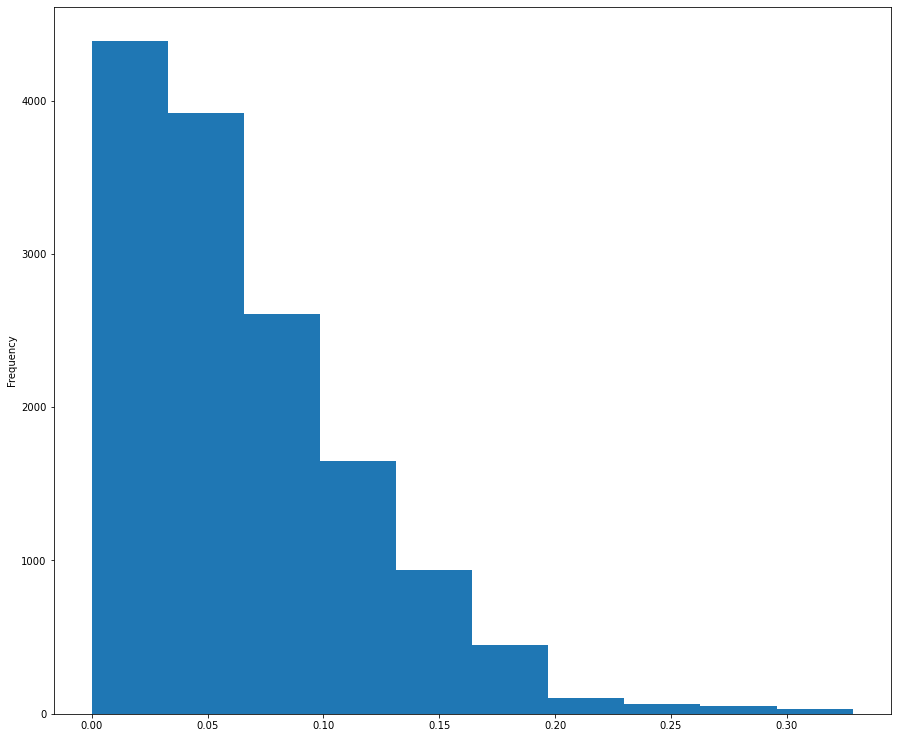

In [40]:
df["Item_Visibility"].plot(kind = "hist")

In [41]:
df.sort_values(by=['Item_Identifier_2','Item_Visibility'])

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,source,Item_Identifier_2,Item_Identifier_3
447,DRH15,8.775000,Low Fat,0.000000,Dairy,45.9428,OUT013,1987,High,Tier 3,Supermarket Type1,790.9704,train,DR,DRH
576,DRB48,16.750000,Regular,0.000000,Soft Drinks,39.3822,OUT046,1997,Small,Tier 1,Supermarket Type1,353.5398,train,DR,DRB
906,DRK12,9.500000,Low Fat,0.000000,Soft Drinks,32.8900,OUT010,1998,NaN,Tier 3,Grocery Store,33.2900,train,DR,DRK
1063,DRG27,8.895000,Low Fat,0.000000,Dairy,42.0138,OUT018,2009,Medium,Tier 3,Supermarket Type2,568.5932,train,DR,DRG
1146,DRH59,10.800000,Low Fat,0.000000,Hard Drinks,72.3380,OUT049,1999,Medium,Tier 1,Supermarket Type1,805.6180,train,DR,DRH
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3316,NCJ31,19.200000,Low Fat,0.305725,Others,239.6196,OUT010,1998,NaN,Tier 3,Grocery Store,NaN,test,NC,NCJ
2855,NCE31,7.670000,Low Fat,0.309390,Household,33.2216,OUT010,1998,NaN,Tier 3,Grocery Store,138.4864,train,NC,NCE
858,NCC18,13.344139,Low Fat,0.310377,Household,172.2422,OUT019,1985,Small,Tier 1,Grocery Store,NaN,test,NC,NCC
2609,NCE31,13.344139,Low Fat,0.323637,Household,35.5216,OUT019,1985,Small,Tier 1,Grocery Store,NaN,test,NC,NCE


In [42]:
df.loc[df["Item_Visibility"] == 0.000000,"Item_Visibility"] = np.NAN

In [43]:
df["Item_Visibility"].isna().sum()

879

In [44]:
df.groupby(["Item_Identifier_2"]).Item_Visibility.transform(lambda x : x.fillna(x.mean()))

0       0.016047
1       0.019278
2       0.016760
3       0.072558
4       0.062099
          ...   
5676    0.013496
5677    0.142991
5678    0.073529
5679    0.072558
5680    0.104720
Name: Item_Visibility, Length: 14204, dtype: float64

In [45]:
df["Item_Visibility"] = df.groupby(["Item_Identifier_2"]).Item_Visibility.transform(lambda x : x.fillna(x.mean()))

In [46]:
df["Item_Type"].value_counts()

Fruits and Vegetables    2013
Snack Foods              1989
Household                1548
Frozen Foods             1426
Dairy                    1136
Baking Goods             1086
Canned                   1084
Health and Hygiene        858
Meat                      736
Soft Drinks               726
Breads                    416
Hard Drinks               362
Others                    280
Starchy Foods             269
Breakfast                 186
Seafood                    89
Name: Item_Type, dtype: int64

In [47]:
df["Item_Type"].isna().sum()

0

In [48]:
len (df["Item_Type"].value_counts())

16

In [49]:
df["Item_Type"].nunique()

16

In [50]:
df["Item_Type"].unique()

array(['Dairy', 'Soft Drinks', 'Meat', 'Fruits and Vegetables',
       'Household', 'Baking Goods', 'Snack Foods', 'Frozen Foods',
       'Breakfast', 'Health and Hygiene', 'Hard Drinks', 'Canned',
       'Breads', 'Starchy Foods', 'Others', 'Seafood'], dtype=object)

In [51]:
df["Item_MRP"].isna().sum()

0

In [52]:
df["Item_MRP"].nunique()

8052

In [53]:
df["Item_MRP"].shape

(14204,)

<AxesSubplot:ylabel='Frequency'>

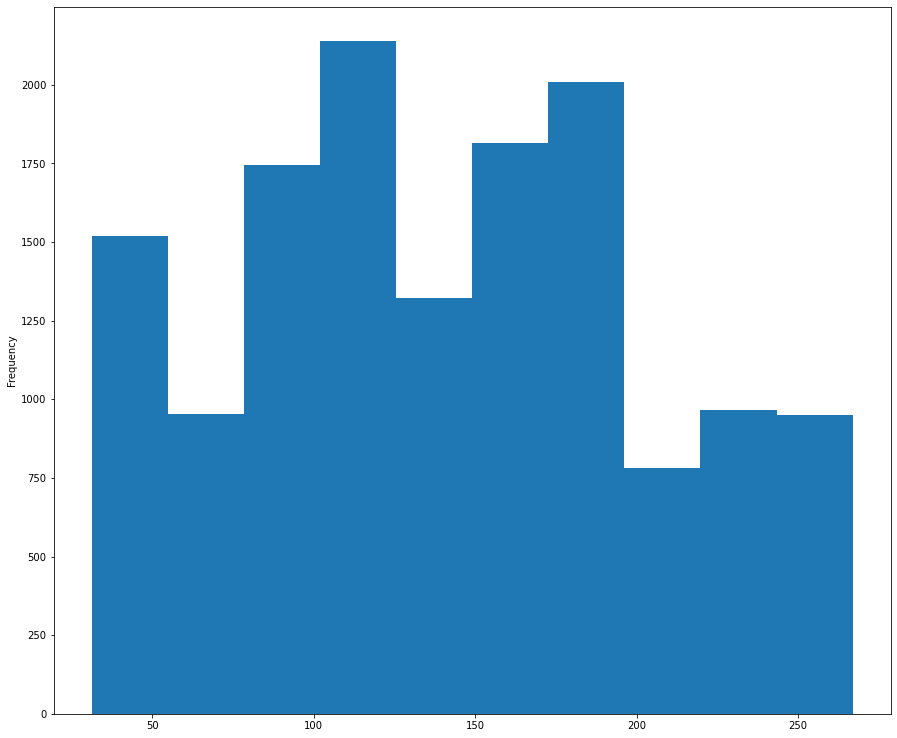

In [54]:
df["Item_MRP"].plot(kind = "hist")

In [55]:
df["Outlet_Identifier"].value_counts()

OUT027    1559
OUT013    1553
OUT035    1550
OUT049    1550
OUT046    1550
OUT045    1548
OUT018    1546
OUT017    1543
OUT010     925
OUT019     880
Name: Outlet_Identifier, dtype: int64

In [56]:
df["Outlet_Identifier"].nunique()

10

In [57]:
df["Outlet_Identifier"].isna().sum()

0

In [58]:
df["Outlet_Establishment_Year"].value_counts()

1985    2439
1987    1553
2004    1550
1997    1550
1999    1550
2002    1548
2009    1546
2007    1543
1998     925
Name: Outlet_Establishment_Year, dtype: int64

In [59]:
df["Outlet_Establishment_Year"].nunique()

9

In [60]:
df["Outlet_Establishment_Year"].shape

(14204,)

In [61]:
df["Outlet_Identifier"].shape

(14204,)

In [62]:
df.groupby("Outlet_Establishment_Year").Outlet_Identifier.value_counts()

Outlet_Establishment_Year  Outlet_Identifier
1985                       OUT027               1559
                           OUT019                880
1987                       OUT013               1553
1997                       OUT046               1550
1998                       OUT010                925
1999                       OUT049               1550
2002                       OUT045               1548
2004                       OUT035               1550
2007                       OUT017               1543
2009                       OUT018               1546
Name: Outlet_Identifier, dtype: int64

In [63]:
from datetime import datetime

In [64]:
datetime.now().year

2021

In [65]:
df["Outlet_Age"] = datetime.now().year-df["Outlet_Establishment_Year"]

In [66]:
df["Outlet_Age"].isna().sum()

0

In [67]:
df["Outlet_Age"].shape

(14204,)

In [68]:
del df["Outlet_Establishment_Year"]

In [69]:
df["Outlet_Size"].value_counts()

Medium    4655
Small     3980
High      1553
Name: Outlet_Size, dtype: int64

In [70]:
df["Outlet_Size"].isna().sum()

4016

In [71]:
df.corr()

,Item_Weight,Item_Visibility,Item_MRP,Item_Outlet_Sales,Outlet_Age
Item_Weight,1.000000,-0.016502,0.033206,0.011182,-0.000312
Item_Visibility,-0.016502,1.000000,-0.008853,-0.133754,0.088624
Item_MRP,0.033206,-0.008853,1.000000,0.567574,-0.000141
Item_Outlet_Sales,0.011182,-0.133754,0.567574,1.000000,0.049135
Outlet_Age,-0.000312,0.088624,-0.000141,0.049135,1.000000


In [72]:
df.groupby(["Outlet_Identifier"]).Outlet_Size.value_counts()

Outlet_Identifier  Outlet_Size
OUT013             High           1553
OUT018             Medium         1546
OUT019             Small           880
OUT027             Medium         1559
OUT035             Small          1550
OUT046             Small          1550
OUT049             Medium         1550
Name: Outlet_Size, dtype: int64

In [73]:
df.groupby(["Outlet_Identifier"]).Outlet_Size.transform(lambda x : x.fillna(x.mode()))

0       Medium
1       Medium
2       Medium
3          NaN
4         High
         ...  
5676     Small
5677    Medium
5678       NaN
5679       NaN
5680       NaN
Name: Outlet_Size, Length: 14204, dtype: object

In [74]:
df.groupby(["Outlet_Location_Type"]).Outlet_Size.value_counts()

Outlet_Location_Type  Outlet_Size
Tier 1                Small          2430
                      Medium         1550
Tier 2                Small          1550
Tier 3                Medium         3105
                      High           1553
Name: Outlet_Size, dtype: int64

In [75]:
df.groupby(["Outlet_Location_Type", "Outlet_Type"]).Outlet_Size.transform(lambda x: x.fillna(x.mode()))

0       Medium
1       Medium
2       Medium
3          NaN
4         High
         ...  
5676     Small
5677    Medium
5678       NaN
5679       NaN
5680       NaN
Name: Outlet_Size, Length: 14204, dtype: object

In [76]:
df.groupby(["Outlet_Type"]).Outlet_Size.transform(lambda x: x.fillna(x.mode()))

0       Medium
1       Medium
2       Medium
3          NaN
4         High
         ...  
5676     Small
5677    Medium
5678       NaN
5679       NaN
5680       NaN
Name: Outlet_Size, Length: 14204, dtype: object

In [77]:
df["Outlet_Size"]=df.groupby(["Outlet_Type"]).Outlet_Size.transform(lambda x:x.fillna(x.mode()))

In [78]:
df["Outlet_Type"].isna().sum()

0

In [79]:
df["Outlet_Location_Type"].isna().sum()

0

In [80]:
df["Outlet_Type"].value_counts()

Supermarket Type1    9294
Grocery Store        1805
Supermarket Type3    1559
Supermarket Type2    1546
Name: Outlet_Type, dtype: int64

In [81]:
df["Outlet_Type"].apply(lambda x : x.split()[0])

0       Supermarket
1       Supermarket
2       Supermarket
3           Grocery
4       Supermarket
           ...     
5676    Supermarket
5677    Supermarket
5678    Supermarket
5679    Supermarket
5680    Supermarket
Name: Outlet_Type, Length: 14204, dtype: object

In [82]:
df["Outlet_Type_Category"] = df["Outlet_Type"].apply(lambda x : x.split()[0])

In [83]:
df["Outlet_Type_Category"].value_counts()

Supermarket    12399
Grocery         1805
Name: Outlet_Type_Category, dtype: int64

In [84]:
df.corr()

,Item_Weight,Item_Visibility,Item_MRP,Item_Outlet_Sales,Outlet_Age
Item_Weight,1.000000,-0.016502,0.033206,0.011182,-0.000312
Item_Visibility,-0.016502,1.000000,-0.008853,-0.133754,0.088624
Item_MRP,0.033206,-0.008853,1.000000,0.567574,-0.000141
Item_Outlet_Sales,0.011182,-0.133754,0.567574,1.000000,0.049135
Outlet_Age,-0.000312,0.088624,-0.000141,0.049135,1.000000


In [85]:
df.select_dtypes(include=np.number).drop(columns=["Item_Outlet_Sales"])

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Age
0,9.30,0.016047,249.8092,22
1,5.92,0.019278,48.2692,12
2,17.50,0.016760,141.6180,22
3,19.20,0.072558,182.0950,23
4,8.93,0.062099,53.8614,34
...,...,...,...,...
5676,10.50,0.013496,141.3154,24
5677,7.60,0.142991,169.1448,12
5678,10.00,0.073529,118.7440,19
5679,15.30,0.072558,214.6218,14


In [86]:
#Check for Multi Collinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor 

# the independent variables set 
X = df.select_dtypes(include=np.number).drop(columns=["Item_Outlet_Sales"])
  
# VIF dataframe 
vif_data = pd.DataFrame() 
vif_data["feature"] = X.columns 
  
# calculating VIF for each feature 
vif_data["VIF"] = [variance_inflation_factor(X.values, i) 
                          for i in range(len(X.columns))] 
  
print(vif_data)

           feature       VIF
0      Item_Weight  6.436093
1  Item_Visibility  2.908423
2         Item_MRP  4.947795
3       Outlet_Age  6.197776


In [87]:
#Check for Multi Collinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor 
# the independent variables set 
X = df.select_dtypes(include=np.number).drop(columns=["Item_Outlet_Sales"]) 
vif_data = pd.DataFrame() 
vif_data["feature"] = X.columns 

# calculating VIF for each feature 
vif_data["VIF"] = [variance_inflation_factor(X.values, i) 
                          for i in range(len(X.columns))] 
  
print(vif_data)

           feature       VIF
0      Item_Weight  6.436093
1  Item_Visibility  2.908423
2         Item_MRP  4.947795
3       Outlet_Age  6.197776


In [88]:
df_number_columns = df.select_dtypes(include = np.number).columns

In [89]:
df_number_columns

Index(['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Item_Outlet_Sales',
       'Outlet_Age'],
      dtype='object')

In [90]:
df_category_columns = df.select_dtypes(exclude = np.number).columns

In [91]:
df_category_columns

Index(['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type', 'source',
       'Item_Identifier_2', 'Item_Identifier_3', 'Outlet_Type_Category'],
      dtype='object')

In [92]:
#Import library:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
#New variable for outlet
df['Outlet'] = le.fit_transform(df['Outlet_Identifier'])
var_mod = ['Item_Fat_Content','Outlet_Location_Type','Outlet_Size','Item_Identifier_2','Outlet_Type','Outlet']
le = LabelEncoder()
for i in var_mod:
    df[i] = le.fit_transform(df[i])

In [93]:
#One Hot Coding:
df = pd.get_dummies(df, columns=['Item_Fat_Content','Outlet_Location_Type','Outlet_Size','Outlet_Type',
                              'Item_Identifier_2','Outlet'])

In [94]:
df_category_columns = df.select_dtypes(exclude = np.number).columns

In [95]:
df_category_columns

Index(['Item_Identifier', 'Item_Type', 'Outlet_Identifier', 'source',
       'Item_Identifier_3', 'Outlet_Type_Category'],
      dtype='object')

In [96]:
data_to_encode = df[df_category_columns].drop(columns = ["Item_Identifier_3","Item_Identifier","Outlet_Identifier", "source"])

In [97]:
df_category_encoded = pd.get_dummies(data_to_encode)

In [98]:
df_category_encoded

,Item_Type_Baking Goods,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,Item_Type_Dairy,Item_Type_Frozen Foods,Item_Type_Fruits and Vegetables,Item_Type_Hard Drinks,Item_Type_Health and Hygiene,Item_Type_Household,Item_Type_Meat,Item_Type_Others,Item_Type_Seafood,Item_Type_Snack Foods,Item_Type_Soft Drinks,Item_Type_Starchy Foods,Outlet_Type_Category_Grocery,Outlet_Type_Category_Supermarket
0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1
2,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
3,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0
4,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5676,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1
5677,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1
5678,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1
5679,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [99]:
df_category_encoded.shape

(14204, 18)

In [100]:
df_final = pd.concat([df_category_encoded, df[df_number_columns],df[["Item_Identifier","Outlet_Identifier", "source"]]], axis= 1)

In [101]:
df_final.shape

(14204, 26)

In [102]:
pd.concat([df_category_encoded,df[df_number_columns],df[["Item_Identifier","Outlet_Identifier","source"]]], axis=1).isna().sum()

Item_Type_Baking Goods                 0
Item_Type_Breads                       0
Item_Type_Breakfast                    0
Item_Type_Canned                       0
Item_Type_Dairy                        0
Item_Type_Frozen Foods                 0
Item_Type_Fruits and Vegetables        0
Item_Type_Hard Drinks                  0
Item_Type_Health and Hygiene           0
Item_Type_Household                    0
Item_Type_Meat                         0
Item_Type_Others                       0
Item_Type_Seafood                      0
Item_Type_Snack Foods                  0
Item_Type_Soft Drinks                  0
Item_Type_Starchy Foods                0
Outlet_Type_Category_Grocery           0
Outlet_Type_Category_Supermarket       0
Item_Weight                            0
Item_Visibility                        0
Item_MRP                               0
Item_Outlet_Sales                   5681
Outlet_Age                             0
Item_Identifier                        0
Outlet_Identifie

In [103]:
df_final=pd.concat([df_category_encoded,df[df_number_columns],df[["Item_Identifier","Outlet_Identifier","source"]]], axis=1)

In [104]:
train_preprocessed = df_final[df_final["source"]=="train"]

In [105]:
test_preprocessed = df_final[df_final["source"]=="test"]

In [106]:
train_preprocessed

,Item_Type_Baking Goods,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,Item_Type_Dairy,Item_Type_Frozen Foods,Item_Type_Fruits and Vegetables,Item_Type_Hard Drinks,Item_Type_Health and Hygiene,Item_Type_Household,Item_Type_Meat,Item_Type_Others,Item_Type_Seafood,Item_Type_Snack Foods,Item_Type_Soft Drinks,Item_Type_Starchy Foods,Outlet_Type_Category_Grocery,Outlet_Type_Category_Supermarket,Item_Weight,Item_Visibility,Item_MRP,Item_Outlet_Sales,Outlet_Age,Item_Identifier,Outlet_Identifier,source
0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,9.300,0.016047,249.8092,3735.1380,22,FDA15,OUT049,train
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,5.920,0.019278,48.2692,443.4228,12,DRC01,OUT018,train
2,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,17.500,0.016760,141.6180,2097.2700,22,FDN15,OUT049,train
3,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,19.200,0.072558,182.0950,732.3800,23,FDX07,OUT010,train
4,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,8.930,0.062099,53.8614,994.7052,34,NCD19,OUT013,train
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,6.865,0.056783,214.5218,2778.3834,34,FDF22,OUT013,train
8519,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,8.380,0.046982,108.1570,549.2850,19,FDS36,OUT045,train
8520,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,10.600,0.035186,85.1224,1193.1136,17,NCJ29,OUT035,train
8521,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,7.210,0.145221,103.1332,1845.5976,12,FDN46,OUT018,train


In [107]:
test_preprocessed

,Item_Type_Baking Goods,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,Item_Type_Dairy,Item_Type_Frozen Foods,Item_Type_Fruits and Vegetables,Item_Type_Hard Drinks,Item_Type_Health and Hygiene,Item_Type_Household,Item_Type_Meat,Item_Type_Others,Item_Type_Seafood,Item_Type_Snack Foods,Item_Type_Soft Drinks,Item_Type_Starchy Foods,Outlet_Type_Category_Grocery,Outlet_Type_Category_Supermarket,Item_Weight,Item_Visibility,Item_MRP,Item_Outlet_Sales,Outlet_Age,Item_Identifier,Outlet_Identifier,source
0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,20.750000,0.007565,107.8622,NaN,22,FDW58,OUT049,test
1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,8.300000,0.038428,87.3198,NaN,14,FDW14,OUT017,test
2,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,14.600000,0.099575,241.7538,NaN,23,NCN55,OUT010,test
3,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,7.315000,0.015388,155.0340,NaN,14,FDQ58,OUT017,test
4,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,12.735577,0.118599,234.2300,NaN,36,FDY38,OUT027,test
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5676,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,10.500000,0.013496,141.3154,NaN,24,FDB58,OUT046,test
5677,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,7.600000,0.142991,169.1448,NaN,12,FDD47,OUT018,test
5678,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,10.000000,0.073529,118.7440,NaN,19,NCO17,OUT045,test
5679,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,15.300000,0.072558,214.6218,NaN,14,FDJ26,OUT017,test


In [108]:
train.shape

(8523, 13)

In [109]:
test.shape

(5681, 12)

In [110]:
del test_preprocessed["source"]
del train_preprocessed["source"]

In [111]:
train_preprocessed.to_csv("train_BM_Preprocessed.csv", index = False)
test_preprocessed.to_csv("test_BM_Preprocessed.csv", index = False)

In [112]:
df_final.to_csv("BM_sales_Preprocessed.csv")

In [113]:
train = pd.read_csv("train_BM_Preprocessed.csv")
test = pd.read_csv("test_BM_Preprocessed.csv")

In [114]:
train.head()

,Item_Type_Baking Goods,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,Item_Type_Dairy,Item_Type_Frozen Foods,Item_Type_Fruits and Vegetables,Item_Type_Hard Drinks,Item_Type_Health and Hygiene,Item_Type_Household,Item_Type_Meat,Item_Type_Others,Item_Type_Seafood,Item_Type_Snack Foods,Item_Type_Soft Drinks,Item_Type_Starchy Foods,Outlet_Type_Category_Grocery,Outlet_Type_Category_Supermarket,Item_Weight,Item_Visibility,Item_MRP,Item_Outlet_Sales,Outlet_Age,Item_Identifier,Outlet_Identifier
0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,9.30,0.016047,249.8092,3735.1380,22,FDA15,OUT049
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,5.92,0.019278,48.2692,443.4228,12,DRC01,OUT018
2,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,17.50,0.016760,141.6180,2097.2700,22,FDN15,OUT049
3,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,19.20,0.072558,182.0950,732.3800,23,FDX07,OUT010
4,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,8.93,0.062099,53.8614,994.7052,34,NCD19,OUT013


In [115]:
train_X = train.drop(columns= ["Item_Outlet_Sales","Item_Identifier", "Outlet_Identifier"])

In [116]:
test_X = test.drop(columns= ["Item_Outlet_Sales","Item_Identifier", "Outlet_Identifier"])

In [117]:
train_y = train["Item_Outlet_Sales"]

In [118]:
len(test_X.columns)

22

In [119]:
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [120]:
sample = pd.read_csv("sample_BM.csv")
def run_model(model, train_X, train_y, test_X, sample, filename ):
    model.fit(train_X, train_y)
    pd.Series(model.coef_,index=test_X.columns).plot(kind = "bar")
    pred_train = model.predict(train_X)
    pred_test = model.predict(test_X)
    pred_test = abs(pred_test)
    print("Mean Absolute Error of train data = ",mean_absolute_error(train_y,pred_train))
    print("RMSE of train data = ",np.sqrt(mean_squared_error(train_y, pred_train)))
    score = cross_val_score(model, train_X, train_y, cv = 10, scoring = "neg_root_mean_squared_error" )
    print("Cross validation Score  = ",np.mean(np.abs(score)))
    print("Mean Absolute Percentage Error of train data = ", mean_absolute_percentage_error(train_y, pred_train))
    sample["Item_Outlet_Sales"] = pred_test
    sample.to_csv(filename, index = False)

Mean Absolute Error of train data =  871.658162102546
RMSE of train data =  1181.637735780806
Cross validation Score  =  1185.5193087253065
Mean Absolute Percentage Error of train data =  108.39520562427624


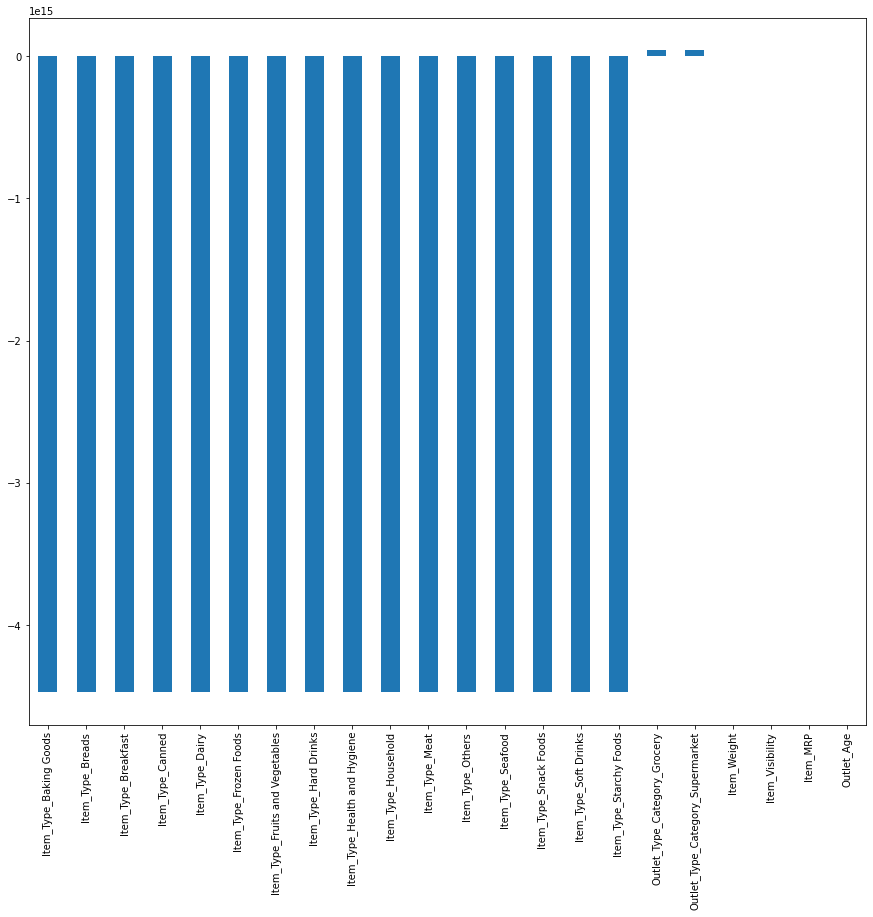

In [121]:
model = LinearRegression(normalize=True)
run_model(model, train_X, train_y, test_X, sample, "test_result_Linear_regression.csv" )

Mean Absolute Error of train data =  871.4609399745704
RMSE of train data =  1181.6306994980102
Cross validation Score  =  1185.4725574666186
Mean Absolute Percentage Error of train data =  107.65024216487602


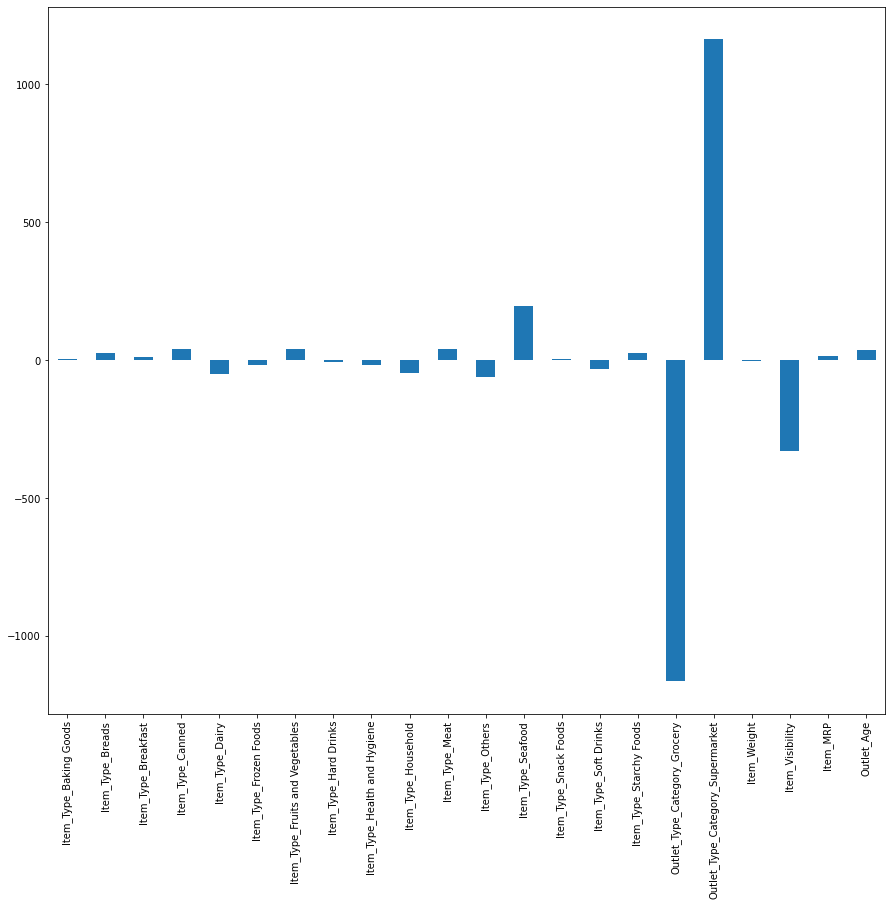

In [122]:
model = Ridge(alpha=0.01,normalize=True)
run_model(model, train_X, train_y, test_X, sample, "test_result_Ridge_regression.csv" )

Mean Absolute Error of train data =  871.6019520392092
RMSE of train data =  1181.583452993692
Cross validation Score  =  1185.2849752446389
Mean Absolute Percentage Error of train data =  108.22619267945437


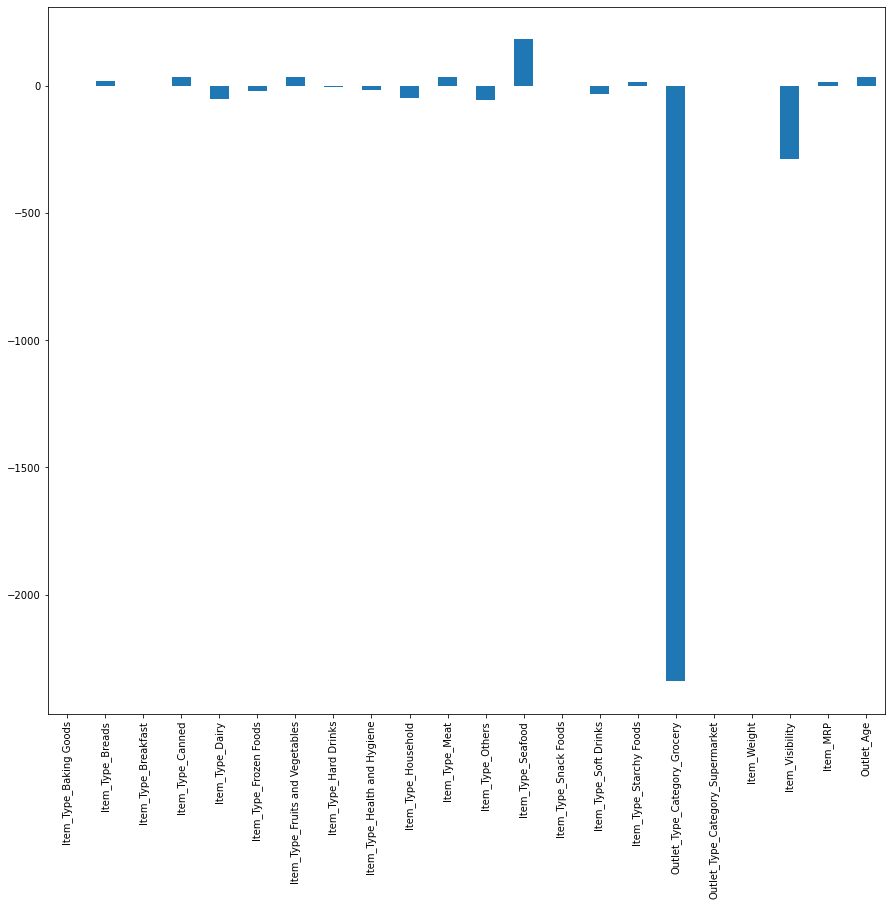

In [123]:
model = Lasso(alpha=0.01,normalize=True,max_iter=100000)
run_model(model, train_X, train_y, test_X, sample, "test_result_Lasso_regression.csv" )

Mean Absolute Error of train data =  871.5923748613208
RMSE of train data =  1181.579282235179
Cross validation Score  =  1185.4186583764515
Mean Absolute Percentage Error of train data =  108.24571812586477


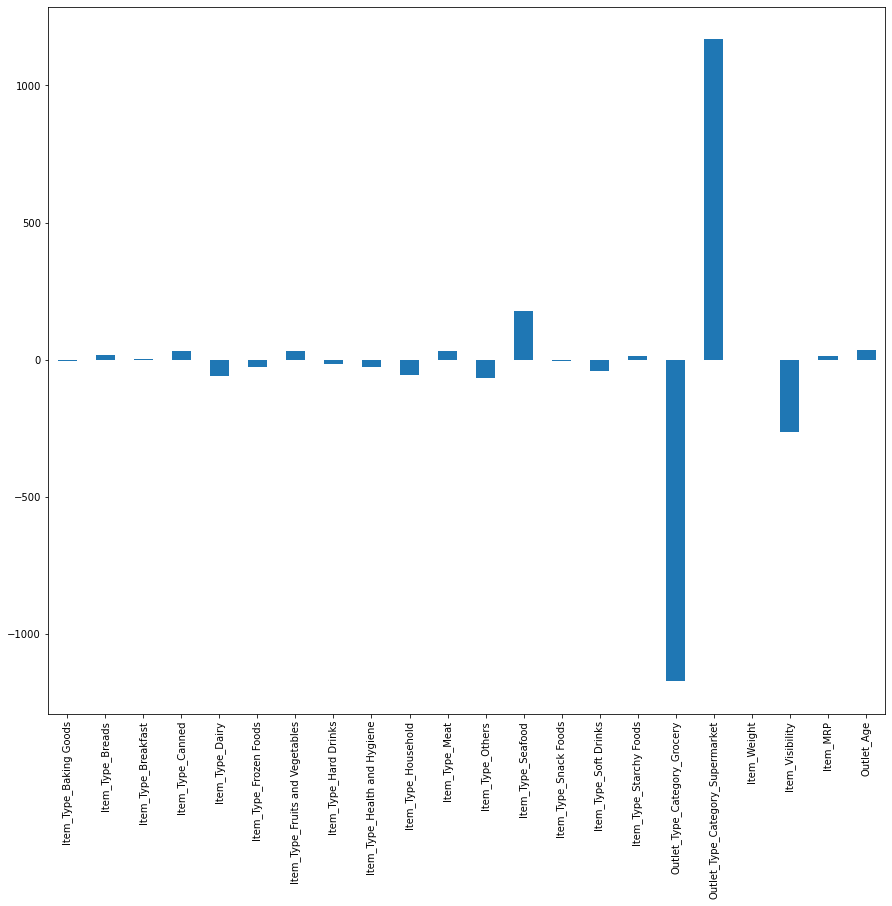

In [124]:
model = ElasticNet(alpha=0.001, l1_ratio=0.6,max_iter=100000)
run_model(model, train_X, train_y, test_X, sample, "test_result_ElasticNet_regression.csv" )

now using Polynomial_Regression 

In [125]:
from sklearn.preprocessing import PolynomialFeatures

assinging degree for the polyniomial

In [126]:
poly = PolynomialFeatures(degree=2)

In [127]:
new_train_X=poly.fit_transform(train_X)
new_test_X=poly.fit_transform(test_X)

In [128]:
new_train_X.shape

(8523, 276)

In [129]:
new_test_X.shape

(5681, 276)

In [130]:
sample = pd.read_csv("sample_BM.csv")
def run_model_1(model, new_train_X, train_y, new_test_X, sample, filename ):
    model.fit(new_train_X, train_y)

    pred_train = model.predict(new_train_X)
    pred_test = model.predict(new_test_X)
    pred_test = abs(pred_test)
    print("Mean Absolute Error of train data = ",mean_absolute_error(train_y,pred_train))
    print("RMSE of train data = ",np.sqrt(mean_squared_error(train_y, pred_train)))
    score = cross_val_score(model, train_X, train_y, cv = 10, scoring = "neg_root_mean_squared_error" )
    print("Cross validation Score  = ",np.mean(np.abs(score)))
    print("Mean Absolute Percentage Error of train data = ", mean_absolute_percentage_error(train_y, pred_train))    
    sample["Item_Outlet_Sales"] = pred_test
    sample.to_csv(filename, index = False)

In [131]:
poly_LR_model= LinearRegression()
run_model_1(poly_LR_model, new_train_X, train_y, new_test_X, sample, "test_result_Poly_Linear_regression.csv" )

Mean Absolute Error of train data =  788.3598749256042
RMSE of train data =  1115.1808412488451
Cross validation Score  =  1185.4703630398994
Mean Absolute Percentage Error of train data =  61.89158833284154


In [132]:
print("Training set score_Ridge: {:.2f}".format(poly_LR_model.score(new_train_X, train_y)))
print("Number of features used_Ridge: {}".format(np.sum(poly_LR_model.coef_ != 0)))

Training set score_Ridge: 0.57
Number of features used_Ridge: 213


In [133]:
Ridge_model = Ridge(alpha = 100, max_iter = 100000)
run_model_1(Ridge_model, new_train_X, train_y, new_test_X, sample, "test_result_Ridge_regression.csv" )

Mean Absolute Error of train data =  789.9938539107898
RMSE of train data =  1117.7146300324257
Cross validation Score  =  1185.5640042251252
Mean Absolute Percentage Error of train data =  61.81025847047488


In [134]:
print("Training set score_Ridge: {:.2f}".format(Ridge_model.score(new_train_X, train_y)))
print("Number of features used_Ridge: {}".format(np.sum(Ridge_model.coef_ != 0)))

Training set score_Ridge: 0.57
Number of features used_Ridge: 154


In [135]:
Lasso_model = Lasso(alpha=10, max_iter=10000)
run_model_1(Lasso_model, new_train_X, train_y, new_test_X, sample, "test_result_Lasso_regression.csv" )

Mean Absolute Error of train data =  796.4243206391707
RMSE of train data =  1122.163412679374
Cross validation Score  =  1183.3774548675024
Mean Absolute Percentage Error of train data =  64.89777793963086


In [136]:
print("Training set score_Lasso: {:.2f}".format(Lasso_model.score(new_train_X, train_y)))
print("Number of features used_Lasso: {}".format(np.sum(Lasso_model.coef_ != 0)))

Training set score_Lasso: 0.57
Number of features used_Lasso: 43


In [137]:
ElasticNet_model = ElasticNet(alpha=1, l1_ratio=0.5, max_iter=100000)
run_model_1(ElasticNet_model, new_train_X, train_y, new_test_X, sample, "test_result_ElasticNet_regression.csv" )

Mean Absolute Error of train data =  795.7580590584598
RMSE of train data =  1122.9043973528292
Cross validation Score  =  1298.5220814126067
Mean Absolute Percentage Error of train data =  64.29353995350861


In [138]:
print("Training set score_elasticnet: {:.2f}".format(ElasticNet_model.score(new_train_X, train_y)))
print("Number of features used_elasticnet: {}".format(np.sum(ElasticNet_model.coef_ != 0)))

Training set score_elasticnet: 0.57
Number of features used_elasticnet: 95


Text(0, 0.5, 'coefficient magnitude')

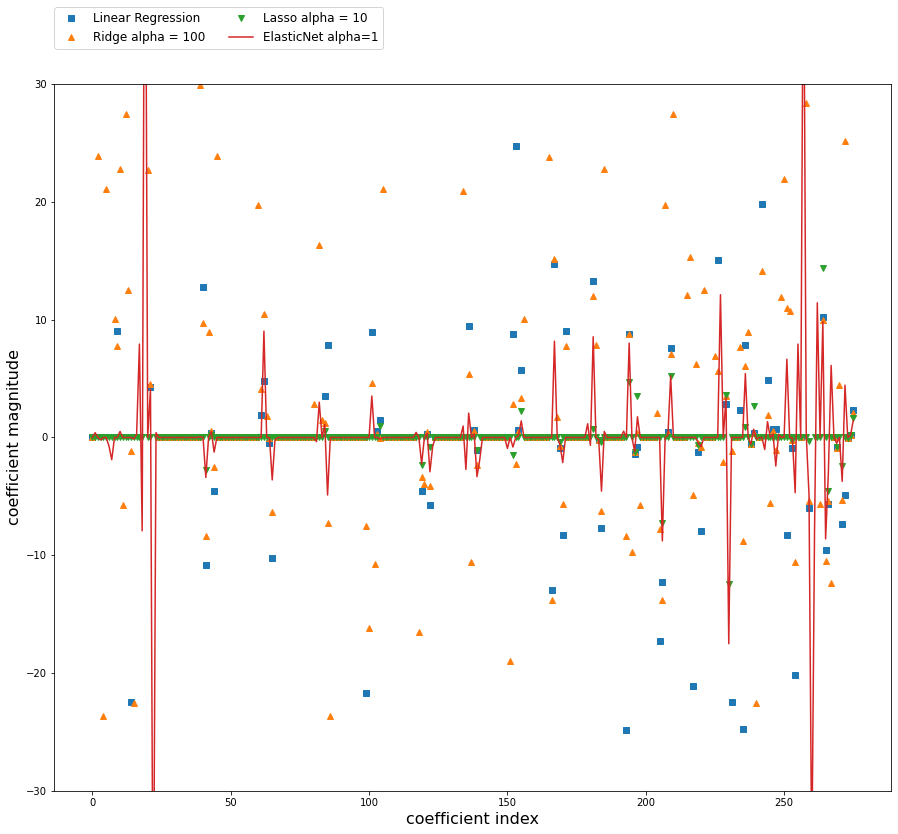

In [139]:
plt.plot(poly_LR_model.coef_,'s',label = "Linear Regression")
plt.plot(Ridge_model.coef_,'^',label = "Ridge alpha = 100")
plt.plot(Lasso_model.coef_,'v',label = "Lasso alpha = 10")
plt.plot(ElasticNet_model.coef_, label = "ElasticNet alpha=1")
plt.legend(ncol=2, loc=(0, 1.05), fontsize = 12)
plt.ylim(-30, 30)
plt.xlabel("coefficient index", fontsize = 16)
plt.ylabel("coefficient magnitude", fontsize = 16)

In [140]:
DecisionTreeRegressor_model = DecisionTreeRegressor(max_depth = 6, random_state=0)
run_model_1(DecisionTreeRegressor_model, new_train_X, train_y, new_test_X, sample, "test_result_DecisionTreeRegressoion.csv" )

Mean Absolute Error of train data =  732.3083961710795
RMSE of train data =  1043.9028557820764
Cross validation Score  =  1098.5465468126245
Mean Absolute Percentage Error of train data =  54.07764357721114


In [141]:
print("Training set score_DecisionTreeRegressor: {:.2f}".format(DecisionTreeRegressor_model.score(new_train_X, train_y)))

Training set score_DecisionTreeRegressor: 0.63


In [142]:
RandomForestRegressor_model = RandomForestRegressor(max_depth = 4, random_state=0)
run_model_1(RandomForestRegressor_model, new_train_X, train_y, new_test_X, sample, "test_result_RandomForestRegression.csv" )

Mean Absolute Error of train data =  751.9316259351838
RMSE of train data =  1067.604437528018
Cross validation Score  =  1096.5284576880836
Mean Absolute Percentage Error of train data =  58.91990818706123


In [143]:
print("Training set score RandomForestRegressor: {:.2f}".format(RandomForestRegressor_model.score(new_train_X, train_y)))

Training set score RandomForestRegressor: 0.61


In [144]:
GradientBoostingRegressor_model = GradientBoostingRegressor(max_depth = 2, random_state=0)
run_model_1(GradientBoostingRegressor_model, new_train_X, train_y, new_test_X, sample, "test_result_GradientBoostingRegression.csv" )

Mean Absolute Error of train data =  738.8637066173075
RMSE of train data =  1046.6835005093733
Cross validation Score  =  1088.5017872712465
Mean Absolute Percentage Error of train data =  57.70789799297167


In [145]:
print("Training set score GradientBoostingRegressor: {:.2f}".format(GradientBoostingRegressor_model.score(new_train_X, train_y)))

Training set score GradientBoostingRegressor: 0.62


In [146]:
XGBRegressor_model = XGBRegressor(max_depth = 2, random_state=0)
run_model_1(XGBRegressor_model, new_train_X, train_y, new_test_X, sample, "test_result_XGBRegression.csv" )

Mean Absolute Error of train data =  718.9398097081382
RMSE of train data =  1012.7116880659948
Cross validation Score  =  1096.2817681314332
Mean Absolute Percentage Error of train data =  55.30580495360417


In [147]:
print("Training set score XgBRegressor: {:.2f}".format(XGBRegressor_model.score(new_train_X, train_y)))

Training set score XgBRegressor: 0.65
